<img src="https://www.bisnia.es/wp-content/uploads/2019/10/limpieza-datos-870x466.jpg">

# Data Clean up

### Import the necessary libraries

In [1]:
import pandas as pd
import src.limpieza_texto as lt
import re
import seaborn as sns

### Import the dateframe

In [2]:
original_data = pd.read_csv("data/attacks.csv",encoding = "ISO-8859-1")

In [3]:
original_data.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1996,2000.10.20,20-Oct-2000,2000.0,Unprovoked,USA,Florida,"Fort Pierce Inlet State Park, St Lucie County",Surfing,Jason Licamele,M,...,NaN,"Stuart News, 10/21/2000",2000.10.20-Licamele.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2000.10.20,2000.10.20,4307.0,NaN,NaN
9650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are some rows where there is no data.

In [4]:
original_data.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

### The first step is to delete all the incomplete values.
We use the function `dropna` to delete `all` the rows where there are no values.

In [5]:
data_filtered_1= original_data.dropna(axis=0, how="all")
print(data_filtered_1.shape)
data_filtered_1.tail()

(8703, 24)


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
8698,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8699,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8700,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we cas see, there are some row where thr `case number` value is `0` and the rest of the values are `Nan`.
First we create a new variable and select the filtered rows of the dataframe where the `case number`value is different from `0`.

In [6]:
data_filtered_2 = lt.valores_distintos(data_filtered_1, "Case Number", "0")
data_filtered_2.tail(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As que can see, there is a value at the end of dataframe where the `Case Number` value is `xx` and the rest of the values of the row `NaN`, so I delete that row using the method `.drop()` and selecting the value of the index.

In [7]:
data_filtered_3 = data_filtered_2.drop(index= 25722)

In [8]:
data_filtered_3.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN
6301,ND.0001,1845-1853,0.0,Unprovoked,CEYLON (SRI LANKA),Eastern Province,"Below the English fort, Trincomalee",Swimming,male,M,...,NaN,S.W. Baker,ND-0001-Ceylon.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0001,ND.0001,2.0,NaN,NaN


There are also some columns called`pdf`, `href formula`, `Unnamed: 22`, `Unnamed: 23`, which I consider that are not useful.

The column `original order` is also no usefull becouse is the same as the index but inverted.

I used a personal function called `.elim_columnas()` to delete all the columns i have selected in a list called `eliminar`.

In [9]:
eliminar = ["Unnamed: 22","Unnamed: 23", "pdf", "href formula", "original order"]
data_filtered_4 = original_data
data_filtered_4=lt.elim_columnas(data_filtered_3, eliminar)
data_filtered_4

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href,Case Number.1,Case Number.2
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002


#### At the end of the dataframe there are to columns, so the next step is to check if the information is difference between them.
I have created a function called `check_columns` that find out the values that are not equal in the selected `columns`.

In [10]:
lt.check_columns(data_filtered_4, "Case Number.1", "Case Number.2").sample(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href,Case Number.1,Case Number.2
5275,1900.00.00.R,Reported to have taken place in 1919,1919.0,Boating,ITALY,NaN,Savona,Fishing,NaN,M,NaN,No injury,N,NaN,13' shark,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,1919.00.00.R,1900.00.00.R
4403,1952.08.05,05-Aug-1952,1952.0,Provoked,ITALY,Teramo,Giulianova,Fishing,Vittorio Speca,NaN,19,Multiple injuries PROVOKED INCIDENT,Y,02h00,2m shark,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...,1952.08.04,1952.08.05
6009,"1853,94.29",29-Apr-1853,1853.0,Unprovoked,GREECE,Corfu,NaN,Swimming,Hanson,M,NaN,Leg severed at knee,N,NaN,234-lb shark,"South Australian Register, 5/8/1854",http://sharkattackfile.net/spreadsheets/pdf_di...,1853.04.29,"1853,94.29"


After analyzing these two columns, you can see that it is the same value as the `case number` column but with different characters, so I decide to delete them.

In [11]:
eliminar_2 = ["Case Number.1", "Case Number.2"]
data_filtered_5 = original_data
data_filtered_5=lt.elim_columnas(data_filtered_4, eliminar_2)
data_filtered_5.sample(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href
454,2015.01.23,23-Jan-2015,2015.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Nahoon Beach,Floating,Christiaan Nel,M,24,Foot bitten,N,Afternoon,NaN,"Daily Dispatch, 1/31/2015",http://sharkattackfile.net/spreadsheets/pdf_di...
3584,1966.03.20,20-Mar-1966,1966.0,Provoked,AUSTRALIA,New South Wales,Maroubra,Fishing (big game),"35' cruiser, Maluka II, occupants: Mr & Mrs E....",NaN,NaN,"No injury to occupants, hooked shark rammed bo...",N,NaN,"Alleged to involve a White shark, 7.6 m [25']",P. W. Gilbert; SAF Case #1435,http://sharkattackfile.net/spreadsheets/pdf_di...
288,2016.04.09,09-Apr-2016,2016.0,Unprovoked,NEW CALEDONIA,Grand Terre,Poe Beach,Walking,Nicole Malignon,F,69,FATAL,Y,10h45,"Tiger shark, 2.5 m",Les Nouvelles Caledonnie. 4/11/2016,http://sharkattackfile.net/spreadsheets/pdf_di...


In [12]:
data_filtered_6 = data_filtered_5.dropna(axis=0, how="all")
data_filtered_6

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,http://sharkattackfile.net/spreadsheets/pdf_di...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, p. 234",http://sharkattackfile.net/spreadsheets/pdf_di...
6298,ND.0004,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,FATAL,Y,NaN,NaN,"H. Taunton; N. Bartlett, pp. 233-234",http://sharkattackfile.net/spreadsheets/pdf_di...
6299,ND.0003,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,FATAL,Y,NaN,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
6300,ND.0002,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,FATAL,Y,NaN,NaN,"The Sun, 10/20/1938",http://sharkattackfile.net/spreadsheets/pdf_di...


## Hypothesis 1

I conducted a study on how many `researchers` there are and how much research they have carried out. Is there a shark attack specialist?

In [13]:
data_filtered_6["Investigator or Source"].unique()

array(['R. Collier, GSAF', 'K.McMurray, TrackingSharks.com',
       'B. Myatt, GSAF', ..., 'F. Schwartz, p.23; C. Creswell, GSAF',
       'The Sun, 10/20/1938', 'S.W. Baker'], dtype=object)

In [14]:
data_filtered_6["Investigator or Source"].value_counts()

C. Moore, GSAF                                              105
C. Creswell, GSAF                                            92
S. Petersohn, GSAF                                           82
R. Collier                                                   55
R. Collier, GSAF                                             48
                                                           ... 
Monroe County Advocate, 10/9/2013                             1
Alton Evening Telegraph, 12/15/1956, p.4                      1
News 7, 5/11/2011                                             1
Perils mentioned by Pliny the Elder (23 A.D. to 76 A.D.)      1
C. Creswell, GSAF; Islandpacket.com, 6/7/2006                 1
Name: Investigator or Source, Length: 4969, dtype: int64

In [15]:
data_filtered_6[data_filtered_5["Investigator or Source"] == "C. Moore, GSAF"].sample(10)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href
4467,1950.07.19,1950.07.19,1950.0,Provoked,ITALY,Savona,Albenga,Fishing,male,NaN,NaN,Harpooned shark bit his forehead PROVOKED INCI...,N,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
5531,1902.08.24.R,Reported 24-Aug-1902,1902.0,Boating,CROATIA,Istria County,Porec,Fishing,Row boat; occupants - 2 young men,M,NaN,"No injury to occupants, shark grabbed anchor r...",N,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
4838,1937.09.26.R,Reported 26-Sep-t937,1937.0,Provoked,CROATIA,Split-Dalmatia County,Bisk,Fishing,2 males,M,NaN,Injured by shark they were trying to catch PRO...,N,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
5324,1915.05.15.R,Reported 15-May-1915,1915.0,Invalid,EGYPT,NaN,Alexandria,Fell overboard,male,M,NaN,Shark involvement not confirmed,NaN,NaN,Shark involvement prior to death unconfirmed,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
4438,1951.08.16.R,Reported 16-Aug-1951,1951.0,Unprovoked,ITALY,Taranto,Torre Colimena,Diving (Hookah),male,M,NaN,No injury,N,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
4337,1954.07.02.R,Reported 02-Jul-1954,1954.0,Unprovoked,GREECE,NaN,Kalamata,Swimming,2 males,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
4074,1959.08.12,12-Aug-1959,1959.0,Provoked,CROATIA,Istria,Pula,Fishing,Narcisco Tomaz,M,NaN,Laceration to arm PROVOKED INCIDENT,N,NaN,20 kg shark,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
3810,1962.07.03.R,Reported 03-Jul-1962,1962.0,Invalid,GREECE,Cyclades,Near Mykonos Island,NaN,Boat with tourists onboard,NaN,NaN,No injury,NaN,NaN,Questionable incident,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
6080,1836.07.26.R,1836.07.26.R,1836.0,Invalid,SPAIN,NaN,NaN,NaN,NaN,NaN,NaN,"Shark caught, contained human remains",NaN,NaN,Shark involvement prior to death unconfirmed,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
6196,ND-0130,Before 1876,0.0,Unprovoked,LEBANON,NaN,NaN,Collecting fish,Kahlifeh,M,NaN,Posterior thigh bitten,N,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...


In [16]:
import src.limpieza_texto as lt

In [17]:
lt.valores_iguales(data_filtered_6, "Investigator or Source", "C. Moore, GSAF")

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href
136,2017.06.07.R,Reported 07-Jun-2017,2017.0,Unprovoked,UNITED KINGDOM,South Devon,Bantham Beach,Surfing,Rich Thomson,M,30,"Bruise to leg, cuts to hand sustained when he ...",N,NaN,"3m shark, probably a smooth hound","C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
2718,1988.08.22.a,22-Aug-1988,1988.0,Unprovoked,ITALY,Manfredonia,Ippocampo,NaN,male,M,16,Survived,N,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
3183,1976.06.02.R,Reported 02-Jun-1976,1976.0,Provoked,ITALY,Reggio Calabria Province,Bovalino,Fishing,Francisco Pelle,M,46,Shark rammed boat PROVOKED INCIDENT,N,NaN,"Blue shark, 2m","C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
3229,1975.04.25,25-Apr-1975,1975.0,Invalid,ITALY,Genoa Province,Cervara,Scuba diving,Walter Sansoni,M,37,The press reported this as an attack by a whit...,NaN,NaN,Invalid,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
3513,1967.08.25,25-Aug-1967,1967.0,Unprovoked,ITALY,Liguria,"Marinella Sarzana, La Spezia",Spearfishing on Scuba,Gian Paolo Porta Casucci,M,NaN,Minor injuries to face & forearm,N,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6155,1742.12.17,17-Dec-1742,1742.0,Unprovoked,NaN,NaN,Carlisle Bay,Swimming,2 impressed seamen,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
6156,1738.04.06.R,Reported 06-Apr-1738,1738.0,Unprovoked,ITALY,Sicily,Strait of Messina,Swimming,male,M,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
6193,ND-0134,Between 1951-1963,0.0,Unprovoked,GREECE,NaN,NaN,Swimming,Martha Hatagouei,F,NaN,FATAL,Y,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...
6196,ND-0130,Before 1876,0.0,Unprovoked,LEBANON,NaN,NaN,Collecting fish,Kahlifeh,M,NaN,Posterior thigh bitten,N,NaN,NaN,"C. Moore, GSAF",http://sharkattackfile.net/spreadsheets/pdf_di...


In [18]:
df1=data_filtered_6.assign(Main_activity = "Not defined")

In [19]:
rsky_list = ["Surfing", "Swimming", "Fishing", "Spearfishing", "Bathing", "Wading", "Diving", "Diving", "Standing", "Snorkeling", "Scuba diving", "Body boarding"]

for i in range(6302):
    re.sub(r"*(D|d)iving*", "Diving", data_filtered_6["Activity"][i])


error: nothing to repeat at position 0

In [20]:
data_filtered_6["Main_activity"] =  [re.sub(r'*[(D|d)iving]*','Diving', str(x)) for x in data_filtered_6["Activity"]]

error: nothing to repeat at position 0

### last step: export the dataset to the data folder  "midatasetlimpio.csv"

In [21]:
shrk = data_filtered_6
shrk.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,href
2778,1987.05.25,25-May-1987,1987.0,Unprovoked,USA,South Carolina,"Myrtle Beach, Horry County",NaN,Josia McSpadden,M,12,"6"" cut to thigh",N,NaN,1.5 m to 1.8 m [5' to 6'] shark,"Charlotte Observer, 5/28/1987",http://sharkattackfile.net/spreadsheets/pdf_di...
5440,1908.01.08,08-Jan-1908,1908.0,Unprovoked,USA,Hawaii,"Mana, Kaua'i",Gathering fish stunned by dynamite,"male, a Japanese fisherman",M,NaN,"FATAL, ""pulled below the surface'",Y,NaN,NaN,"C.H. Townsend, Bull. N.Y. Zoological Society, ...",http://sharkattackfile.net/spreadsheets/pdf_di...
2174,1998.08.01.b,01-Aug-1998,1998.0,Unprovoked,SOUTH AFRICA,Western Cape Province,"Buffalo Bay, near Knysna",Surfing (or body boarding),Ross Taylor,M,19,Legs bitten,N,NaN,"White shark, 4 m [13']","Daily Record (Glasgow, Scotland), 8/3/1998",http://sharkattackfile.net/spreadsheets/pdf_di...
715,2012.12.25,25-Dec-2012,2012.0,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Port St. John's,Swimming,Liya Sibili,M,20,FATAL,Y,NaN,Tiger shark,"SAPA, 12/27/2012",http://sharkattackfile.net/spreadsheets/pdf_di...
887,2011.08.15,15-Aug-2011,2011.0,Invalid,USA,South Carolina,"Myrtle Beach, Horry County",Playing in the surf,Rudy Varney,M,7,Puncture wounds to foot,N,NaN,Shark involvement not confirmed,"C. Creswell; Carolina Live, 8/15/2011",http://sharkattackfile.net/spreadsheets/pdf_di...


In [22]:
df_surf = shrk[shrk["Activity"] == "Surfing"]

In [23]:
df_swi = shrk[shrk["Activity"] == "Swimming"]

In [24]:
df_div = shrk[shrk["Activity"] == "Diving"]

<AxesSubplot:xlabel='count', ylabel='Activity'>

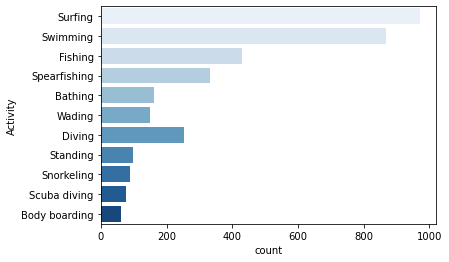

In [37]:
rsky_list = [ "Swimming", "Fishing", "Spearfishing", "Bathing", "Wading", "Diving", "Diving", "Standing", "Snorkeling", "Scuba diving", "Body boarding"]
#def grafico_actividades(lista, color):

df_final = shrk[shrk["Activity"] == "Surfing"]
for i in rsky_list:
    
    i =shrk[shrk["Activity"] == i]
    df_final = pd.concat([df_final,i])
    
df_final.sample(5)
sns.countplot(y=df_final.Activity, palette="Blues")

In [39]:
rsky_list[0]

'Swimming'

In [42]:
rsky_list = [ "Swimming", "Fishing", "Spearfishing", "Bathing", "Wading", "Diving", "Diving", "Standing", "Snorkeling", "Scuba diving", "Body boarding"]
def grafico_actividades(lista, color):

    df_final = shrk[shrk["Activity"] == lista[0]]
    lista.pop(0)
    for i in lista:

        i =shrk[shrk["Activity"] == i]
        df_final = pd.concat([df_final,i])

    df_final.sample(5)
    return sns.countplot(y=df_final.Activity, palette=color)

<AxesSubplot:xlabel='count', ylabel='Activity'>

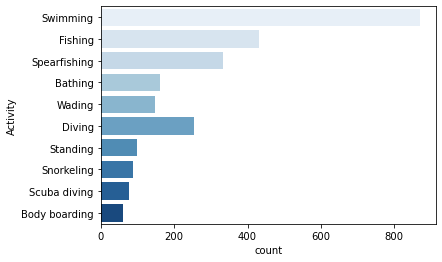

In [43]:
grafico_actividades(rsky_list, "Blues")

<AxesSubplot:xlabel='Activity', ylabel='count'>

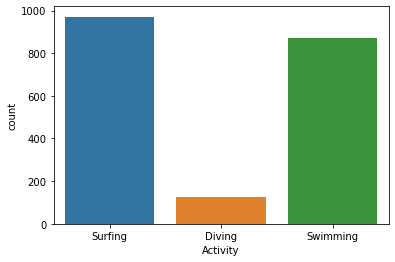

In [32]:
import seaborn as sns
aa = pd.concat([df_surf,df_div,df_swi])
sns.countplot(x=aa.Activity)

In [87]:
shrk.to_csv(".\Data\midatasetlimpio.csv")